# A guide to Time series analysis

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [5]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [6]:
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

In [7]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


# Data Preprocessing
Make sure the data is equidistant in timestamp

In [27]:
df['date_dist'] = df['date'] - df['date'].shift(1)

In [30]:
df['date_dist'].sum(), len(df)

(Timedelta('4198 days 00:00:00'), 4199)

## Missing data
A few ways to fill missing data
- Fill NAN with zero
- Fill NAN with statistic ex: median or mean
- Fill NAN with interpolated value
- Fill NAN with most frequent (mode)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.isnull().sum()

date                    0
rainfall                0
depth_to_groundwater    0
temperature             0
drainage_volume         0
river_hydrometry        0
dtype: int64

In [10]:
import numpy as np

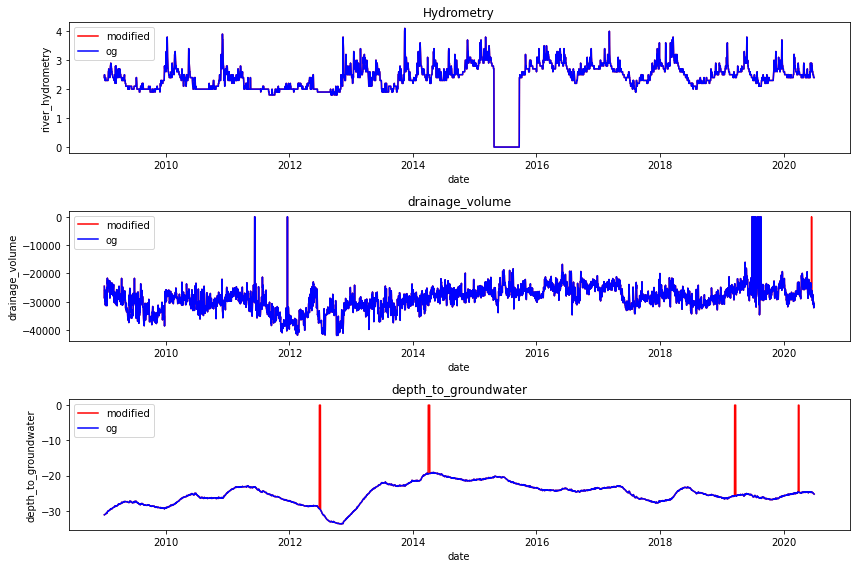

In [11]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize = (12,8))

og_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0,np.nan)

og_groundwater = df['depth_to_groundwater']
df['depth_to_groundwater'] = df['depth_to_groundwater'].replace(0,np.nan)

og_drainage = df['drainage_volume']
df['drainage_volume'] = df['drainage_volume'].replace(0,np.nan)

sns.lineplot(ax=ax[0], x = df['date'], y = df['river_hydrometry'].fillna(0), color = 'red', label = 'modified')
sns.lineplot(ax=ax[0], x = df['date'], y = og_hydrometry, color = 'blue', label = 'og')
ax[0].set_title('Hydrometry')

sns.lineplot(ax=ax[1], x = df['date'], y = df['drainage_volume'].fillna(0), color = 'red', label = 'modified')
sns.lineplot(ax=ax[1], x = df['date'], y = og_drainage, color = 'blue', label = 'og')
ax[1].set_title('drainage_volume')

sns.lineplot(ax=ax[2], x = df['date'], y = df['depth_to_groundwater'].fillna(0), color = 'red', label = 'modified')
sns.lineplot(ax=ax[2], x = df['date'], y = og_groundwater, color = 'blue', label = 'og')
ax[2].set_title('depth_to_groundwater')

plt.tight_layout()

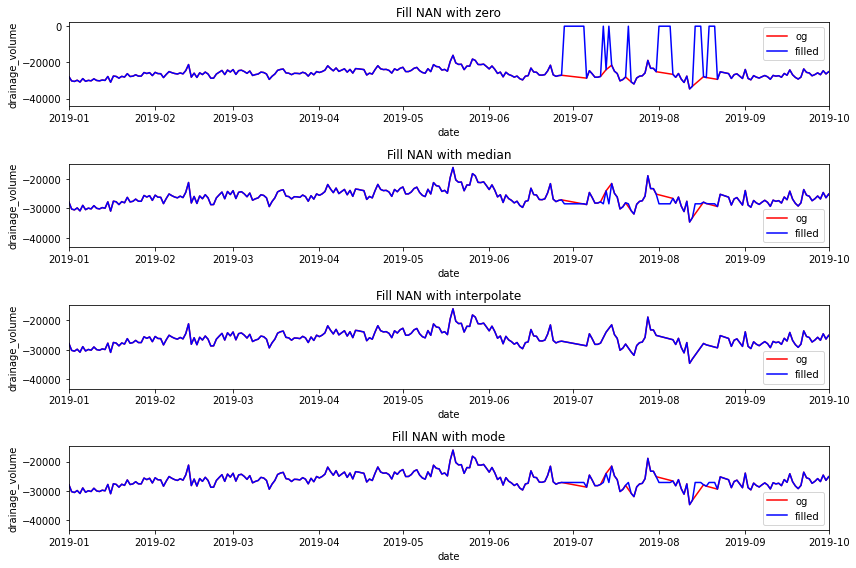

In [132]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (12,8))

sns.lineplot(ax=ax[0], x = df['date'], y = df['drainage_volume'], color = 'red', label = 'og')
sns.lineplot(ax=ax[0], x = df['date'], y = df['drainage_volume'].fillna(0), color = 'blue', label = 'filled')
ax[0].set_xlim([date(2019, 1, 1), date(2019, 10, 1)])
ax[0].set_title('Fill NAN with zero')

sns.lineplot(ax=ax[1], x = df['date'], y = df['drainage_volume'], color = 'red', label = 'og')
sns.lineplot(ax=ax[1], x = df['date'], y = df['drainage_volume'].fillna(df['drainage_volume'].median()), color = 'blue', label = 'filled')
ax[1].set_xlim([date(2019, 1, 1), date(2019, 10, 1)])
ax[1].set_title('Fill NAN with median')

sns.lineplot(ax=ax[2], x = df['date'], y = df['drainage_volume'], color = 'red', label = 'og')
sns.lineplot(ax=ax[2], x = df['date'], y = df['drainage_volume'].fillna(df['drainage_volume'].interpolate()), color = 'blue', label = 'filled')
ax[2].set_xlim([date(2019, 1, 1), date(2019, 10, 1)])
ax[2].set_title('Fill NAN with interpolate')

sns.lineplot(ax=ax[3], x = df['date'], y = df['drainage_volume'], color = 'red', label = 'og')
sns.lineplot(ax=ax[3], x = df['date'], y = df['drainage_volume'].fillna(df['drainage_volume'].mode()[0]), color = 'blue', label = 'filled')
ax[3].set_xlim([date(2019, 1, 1), date(2019, 10, 1)])
ax[3].set_title('Fill NAN with mode')

plt.tight_layout()

In [13]:
# Visually interpolation looks to be the best method to fill data
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

In [15]:
df.isnull().sum()

date                    0
rainfall                0
depth_to_groundwater    0
temperature             0
drainage_volume         0
river_hydrometry        0
dtype: int64

# Feature Engineering
- Parsing date into different columns
- Time series decompisition
- Lag (Diff)

## Time series decomposition
Time series can be think of a combination of
- Level: The average value of the time series
- Trend: The increasing or decreasing value in the series
- Seasonality: The small repeating cycles
- Noise: The random variation

Two common compositions are
- Additive composition -> The above components are additive. (Visually when amplitude our constant)
- Multiplicative compsition -> The above components are multiplied (Visually when amplitude our increasing)

Choosing the correct period to decompse the time series is key to decompose time series. A period should be the total time step that is to complete one seasonal cycle.
For example: In the example below, 10 sine waves are created in a time series that has a total of 100 time steps. Therefore, the period should be 10. because it takes 10 time steps in total to complete one seasonal cycle.

In [193]:
time_step = 101

psuedo_trend = np.array([ i for i in range(0,time_step)])

T = 10
time = np.arange(time_step)
psuedo_seasonality =  np.sin((2 * np.pi  / T)*time) * 10

mean = 0
std = 3
psuedo_noise = np.random.normal(mean, std, size=time_step)

pseudo_add_time_series = psuedo_trend + psuedo_seasonality + psuedo_noise
pseudo_mult_time_series = psuedo_trend * psuedo_seasonality * psuedo_noise


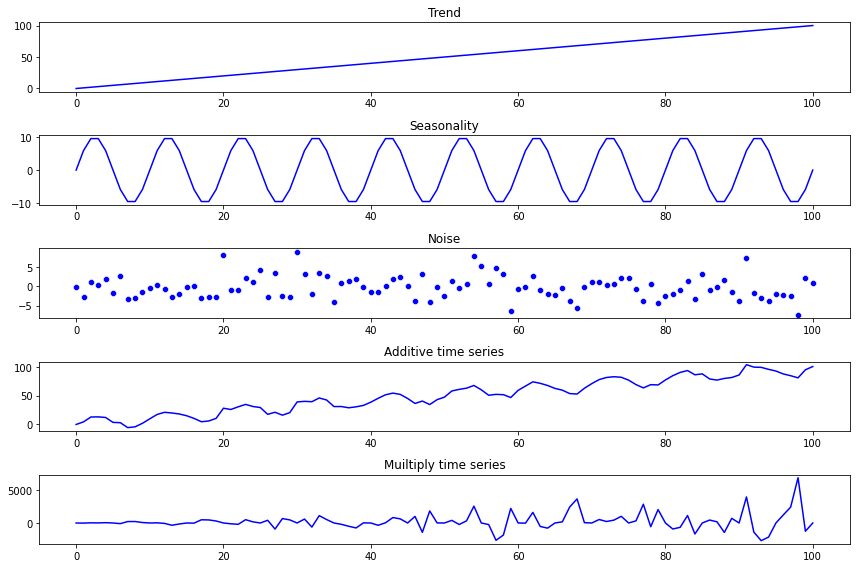

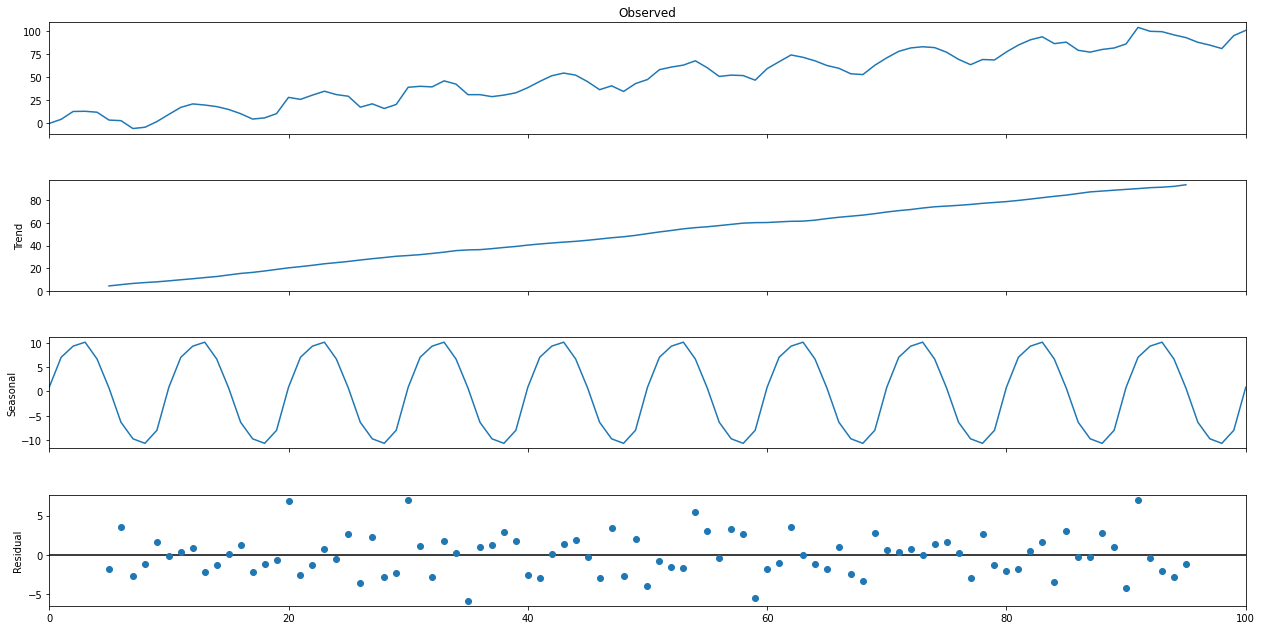

In [194]:
fig , ax = plt.subplots(nrows = 5, ncols = 1,figsize = (12,8))

sns.lineplot(ax=ax[0], data = psuedo_trend, color = 'blue')
ax[0].set_title('Trend')

sns.lineplot(ax=ax[1], data = psuedo_seasonality, color = 'blue')
ax[1].set_title('Seasonality')

sns.scatterplot(ax=ax[2], data = psuedo_noise, color = 'blue')
ax[2].set_title('Noise')

sns.lineplot(ax=ax[3], data = pseudo_add_time_series, color = 'blue')
ax[3].set_title('Additive time series')

sns.lineplot(ax=ax[4], data = pseudo_mult_time_series, color = 'blue')
ax[4].set_title('Muiltiply time series')

plt.tight_layout()

decompose_value = seasonal_decompose(pseudo_add_time_series, model='additive',period = 10) # choosing the coorect period is key to the decomposition

fig = decompose_value.plot()
fig.set_size_inches((20, 10))

# decompose_value = seasonal_decompose(pseudo_add_time_series, model='multiplicative',period = 10)
# fig = decompose_value.plot()
# fig.set_size_inches((20, 10))


In [16]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter

C:\Users\User\AppData\Local\Temp\ipykernel_15092\867297069.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear


In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Seasonal decomposition
Earlier we mentioned at the most important parameter is the "Period". However, most often times the period is unkown it should be tested out. I n our case, "temperature" is the easiest column to determine a good period.Therefore, we will be using that period for all other columns we could like to decompose for convenience.

In [202]:
4199/12

349.9166666666667

<AxesSubplot:xlabel='date', ylabel='temperature'>

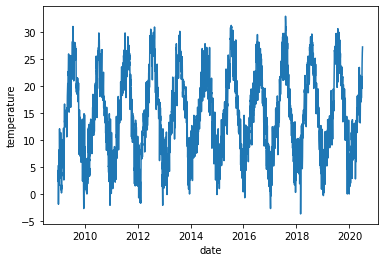

In [208]:
sns.lineplot( x = df['date'], y = df['temperature'])
# according to the plot. temperature has a annual period which is intuitive, so we will use period of 365 days

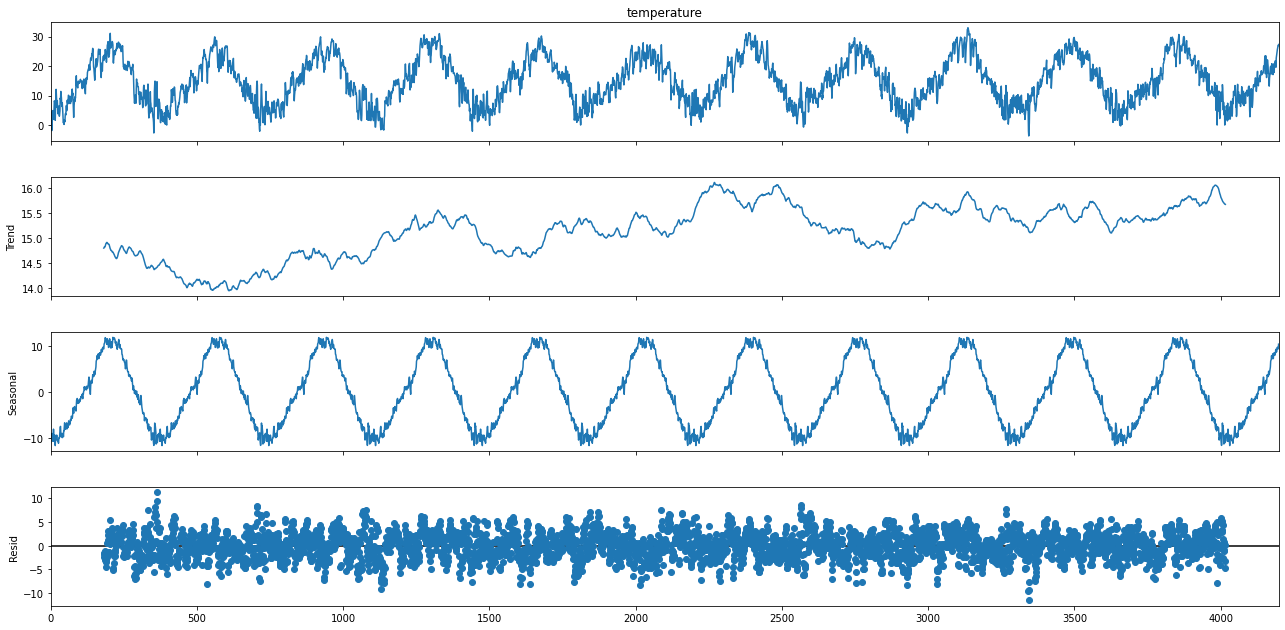

In [206]:
decompose_value = seasonal_decompose(df['temperature'], model='additive',period = 365)
fig = decompose_value.plot()
fig.set_size_inches((20, 10))

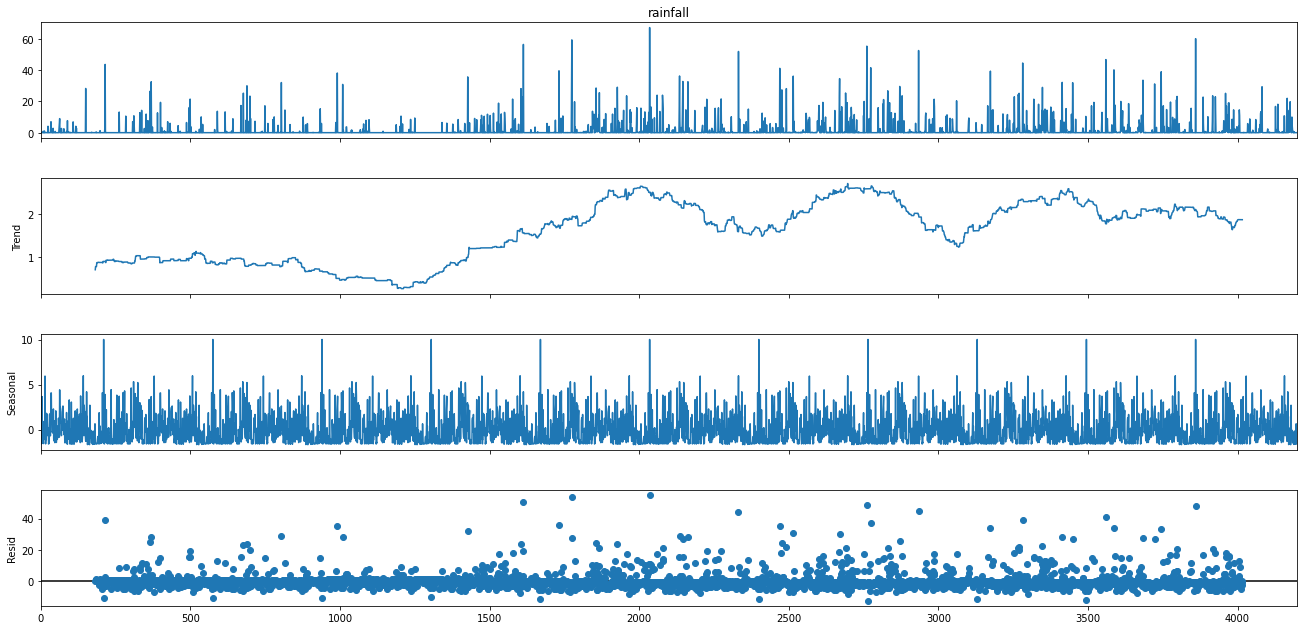

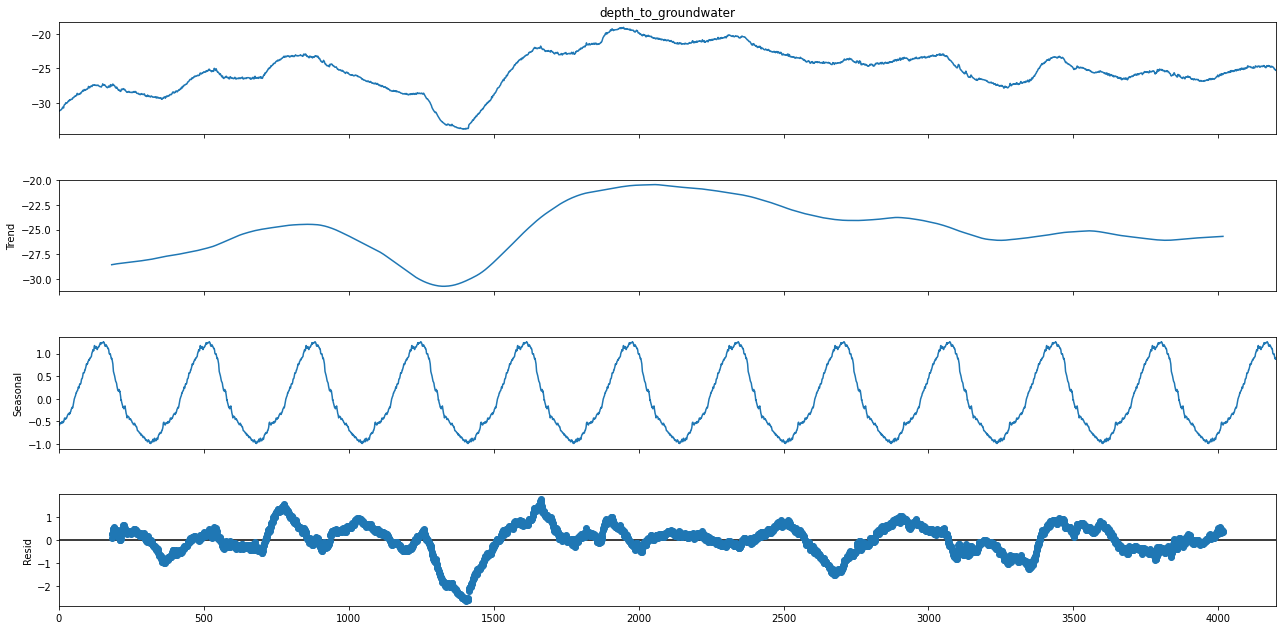

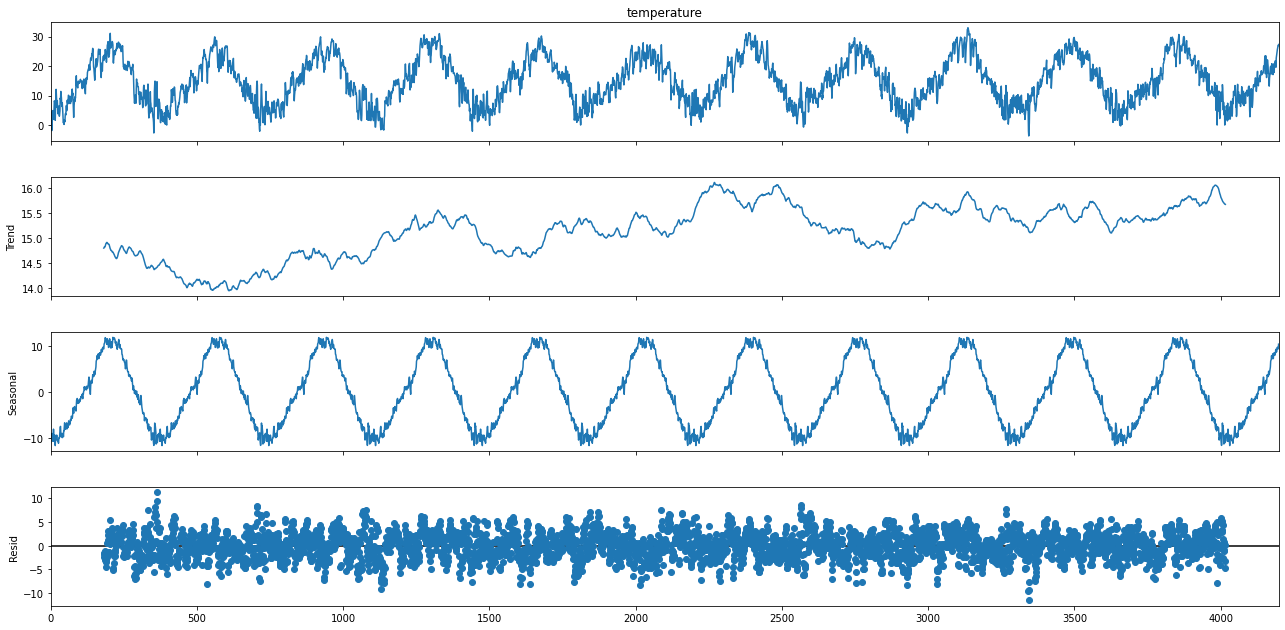

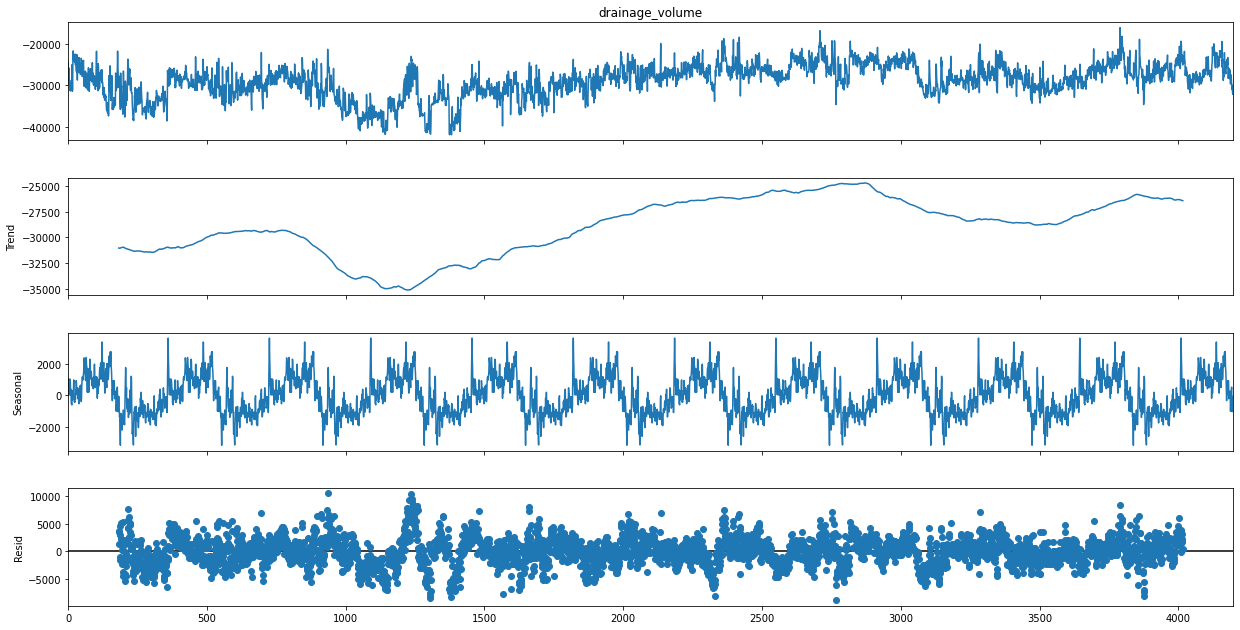

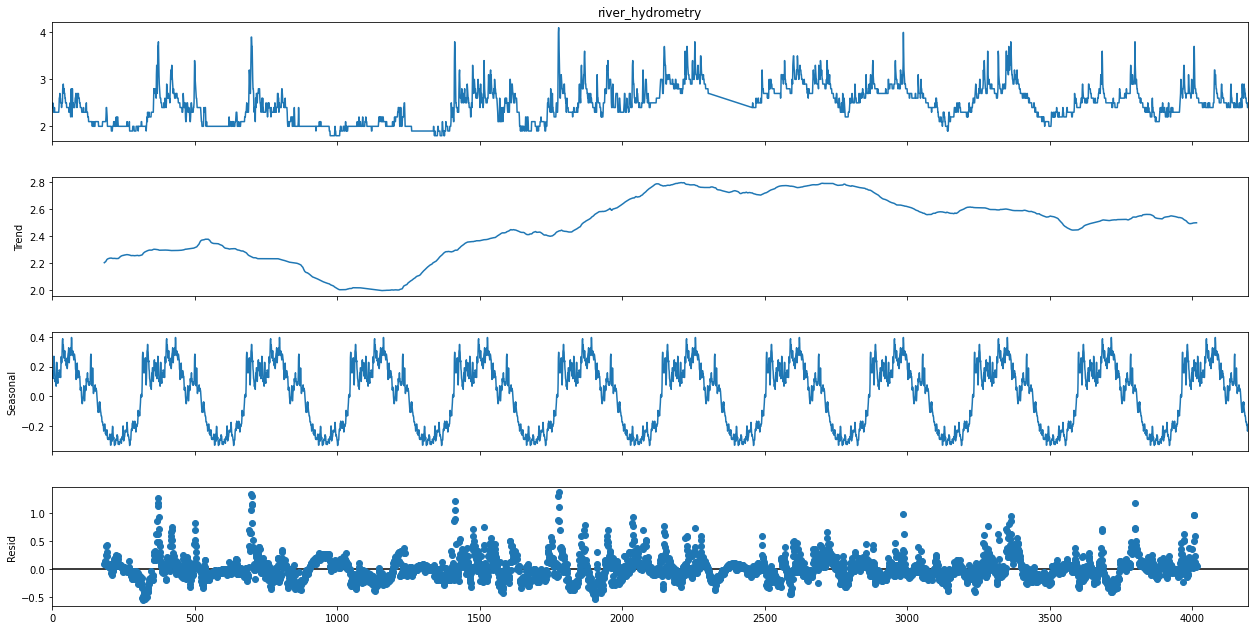

In [209]:
cols_to_decompose = ['rainfall', 'depth_to_groundwater', 'temperature',
       'drainage_volume', 'river_hydrometry']
for columns in cols_to_decompose:
    decompose_value = seasonal_decompose(df[columns], model='additive',period = 365)
    fig = decompose_value.plot()
    fig.set_size_inches((20, 10))


### How to read a decompose graph?